## Multiple Regression with Scikit Learn
[boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

## <u>Contents</u>
- [**Imports**](#imports)
- [**Check out the Data**](#data)
- [**Data Exploration with Pandas Dataframes**](#exploration)
- [**Descriptive Statistics**](#descriptive)
- [**Cleaning data - check for missing values**](#clean)
- [**Visualizing Data - Histograms, Distributions and Bar Charts**](#viz)
- [**Correlation**](#corr)
- [**Visualizing Data - Scatter plots**](#scat)
- [simple regression](#simple)
    - [**Model Evaluation**](#simpleval)
- [multiple regression](#multiple)
    - [**t-stat and p-values**](#pvalue)
    - [**Creating and Training the Model**](#model)
    - [**Predictions from our Model**](#predict)
    - [**Model Evaluation**](#eval)
- [**Improving the Model using Data Transformations**](#transform)   
- [**Feature Selection**](#feature)
- [**Feature selection through Standardization**](#stand)
- [**Making predictions with the standardized coefficients (weights)**](#predi)
- [Example 2: **Predict Movie Box Office Revenue**](#movie)
- [Example 3: **LSD vs Math Test Scores**](#lsd)
- [**Practical example**](#practical)

### Other Methods to OLS
- Generalized least squares
- Maximum likelihood estimation
- Bayesian regression
- Kernel regression
- Gaussian process regression

<a id='imports'></a>
### <u>Notebook Imports</u>

In [1]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import boston_valuation as val

%matplotlib inline

This will overide the matplotlib settings and set them to the seaborn settings

In [2]:
# sns.set()

<a id='data'></a>
### <u>Check out the Data</u>

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

# If the file is located locally:
# boston_df = pd.read_csv('./datasets/boston_housing.csv')

In [4]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
# print(boston['DESCR'])  
# print(boston.DESCR)

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
boston.data.shape # chaining dot notation

(506, 13)

In [10]:
# Actual prices in thousands (000s) 
# print the first 100 values
boston.target[:100]   

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2])

<a id='exploration'></a>
### <u>Data Exploration with Pandas Dataframes</u>

In [11]:
# Create a pandas dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Add column with the price (target)
df['MEDV'] = boston.target
# df.insert(0,'MEDV',boston.target)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# list of column names
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [13]:
# count of the number of rows
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<a id='descriptive'></a>
### <u>Descriptive Statistics</u>

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<a id='clean'></a>
### <u>Cleaning data - check for missing values</u>

In [16]:
df.isnull().any()

# pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

<a id='viz'></a>
### <u>Visualizing Data - Histograms, Distributions and Bar Charts</u>
https://flatuicolors.com/

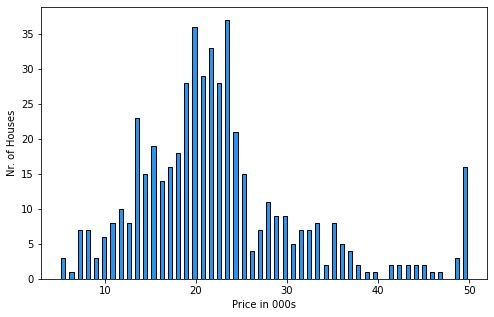

In [17]:
# ec = edgecolor

plt.figure(figsize=(8, 5))
plt.hist(df['MEDV'], bins=50, ec='black', color='#2196f3', rwidth=0.5)
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

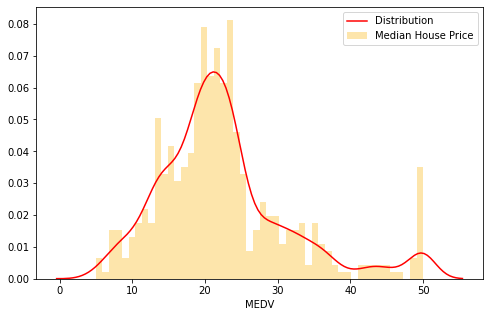

In [18]:
plt.figure(figsize=(8, 5))
sns.distplot(df['MEDV'], bins=50, hist=True, kde=True, color='#fbc02d',
            kde_kws={'color':'red','label':'Distribution'},label='Median House Price')
plt.legend()
plt.show()

In [19]:
frequency = df['RAD'].value_counts()
frequency

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [20]:
frequency.index
# frequency.axes[0]

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

In [21]:
frequency.values

array([132, 115, 110,  38,  26,  24,  24,  20,  17], dtype=int64)

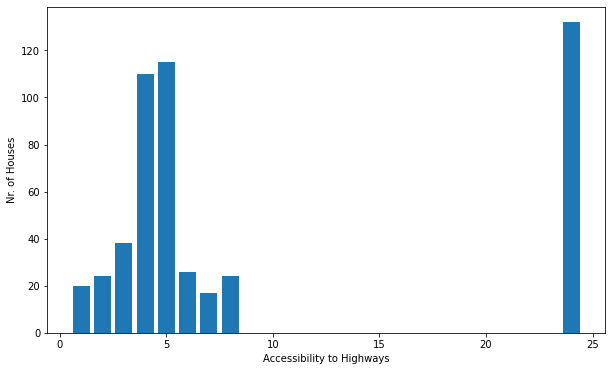

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(x=frequency.index, height=frequency)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

<a id='corr'></a>
### <u>Correlation</u>
Correlation is the degree to which things move together. More valid for continuous variables.
$$-1.0\leq\rho _{XY} = corr(X,Y)\leq+1.0$$

In [23]:
# individual correlation for MEDV vs RM
df['MEDV'].corr(df['RM'])

0.6953599470715396

In [24]:
# round(df.corr(),2)

df.corr()  # Pearson Correlation Coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [25]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

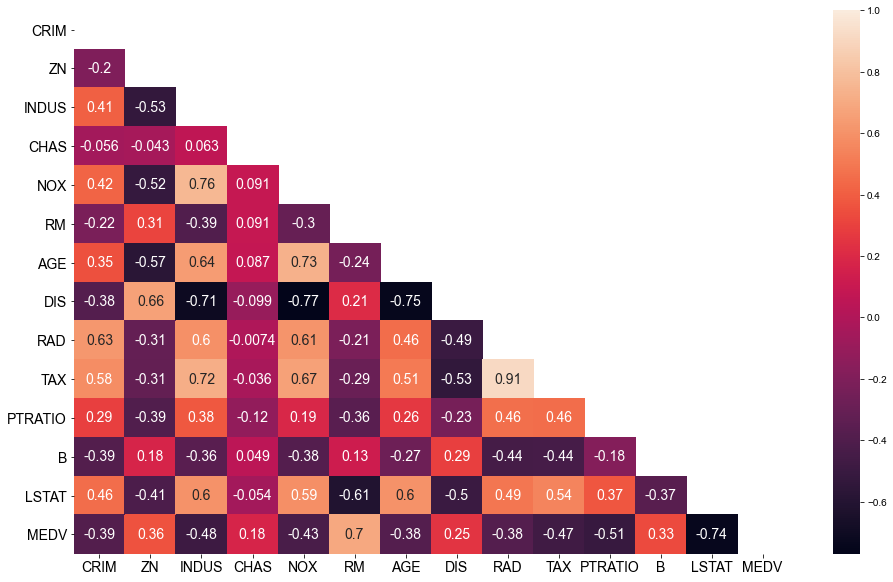

In [26]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<a id='scat'></a>
### <u>Visualizing Data - Scatter plots</u>
If the scatter points are all over the place, this implies there is no specific relationship

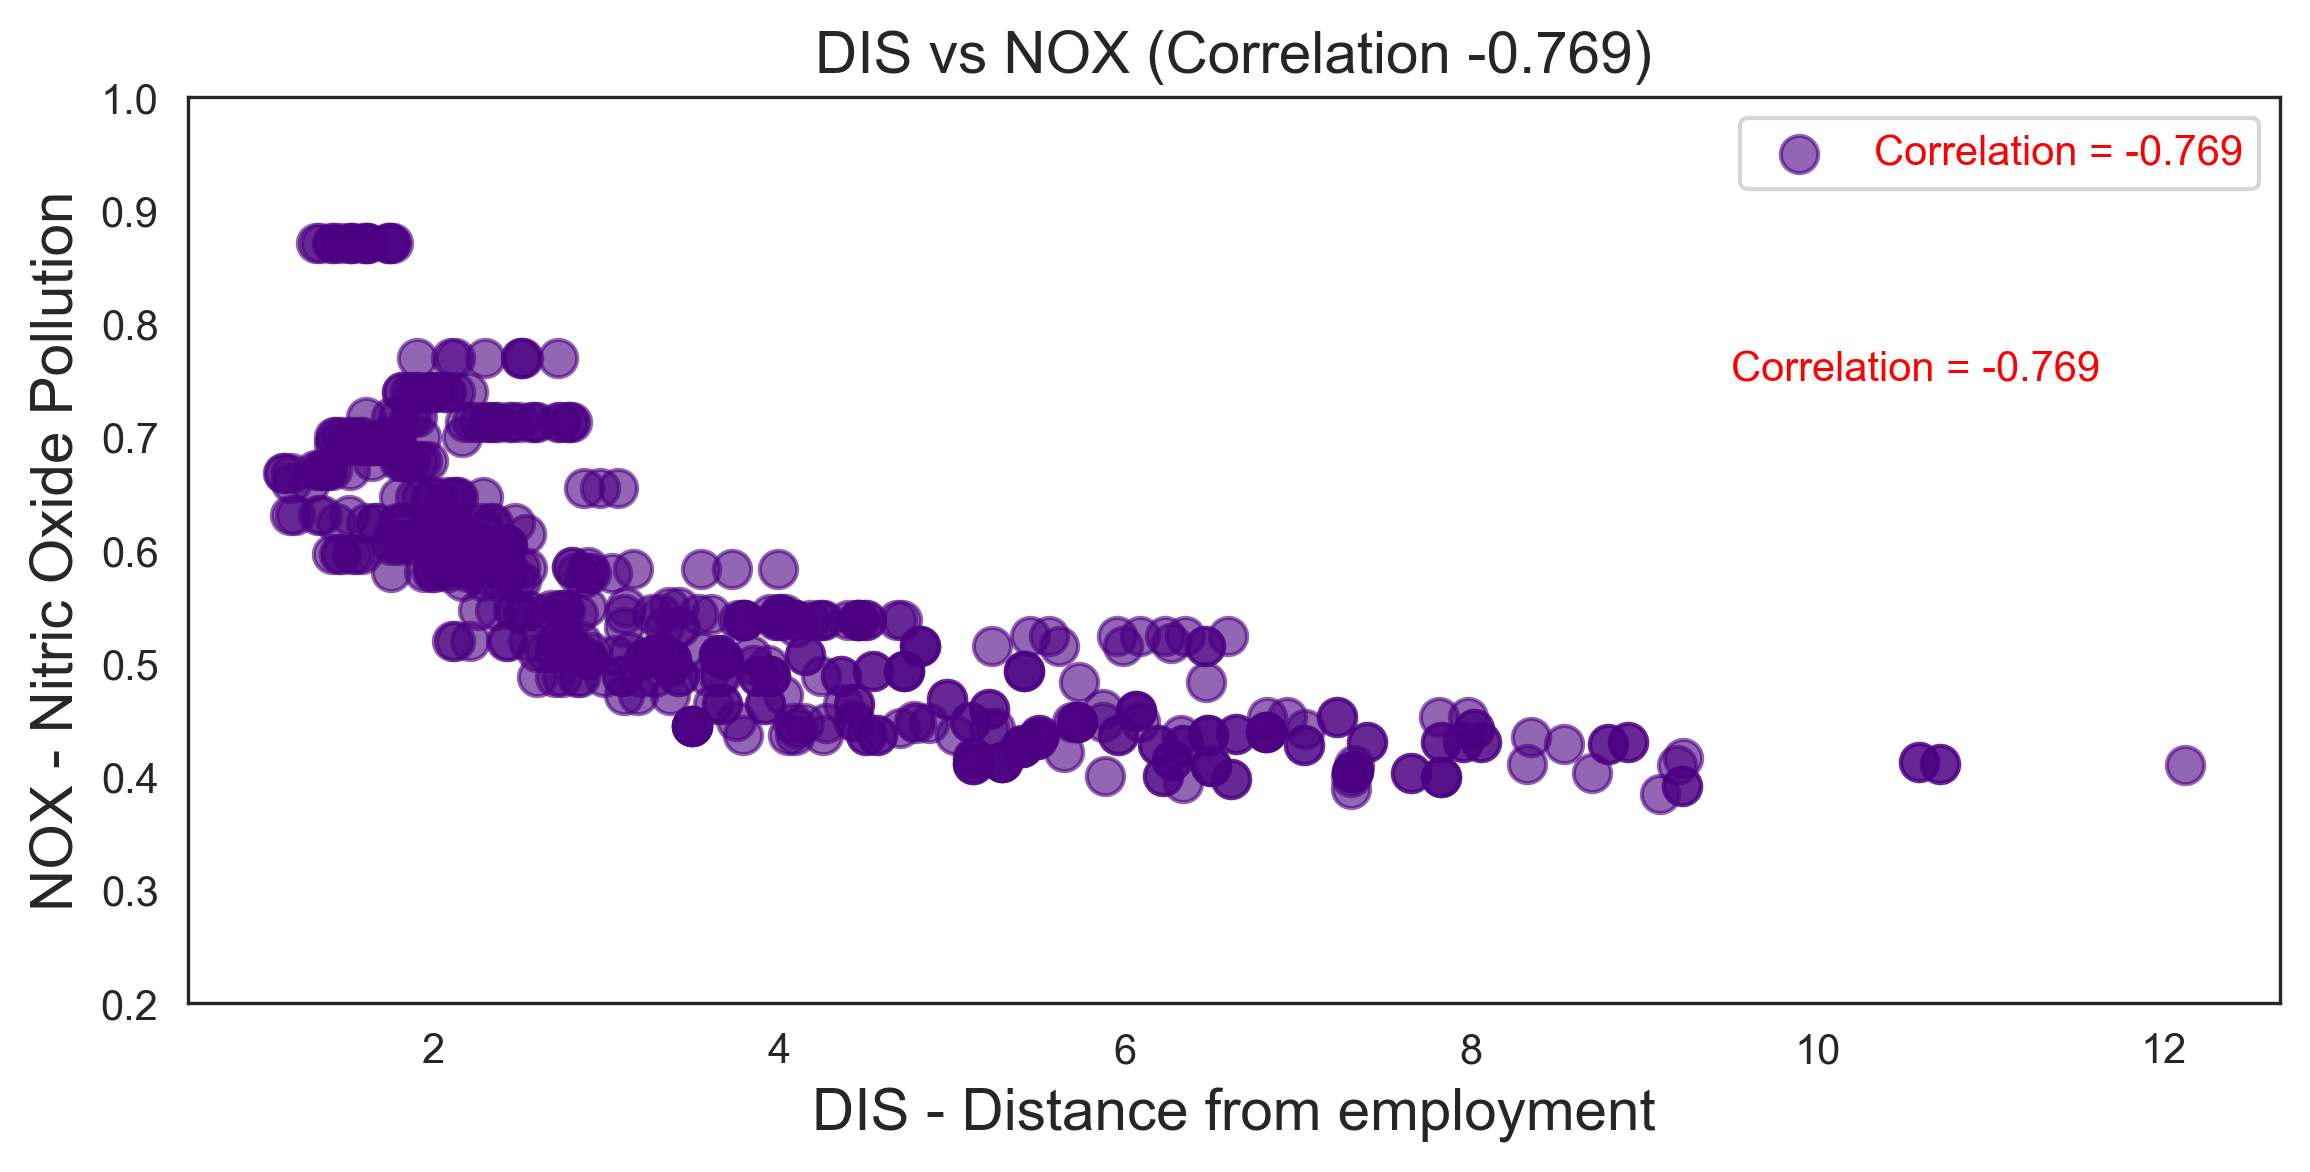

In [27]:
# scatter plot between DIS and NOX
nox_dis_corr = round(df['NOX'].corr(df['DIS']), 3)

plt.figure(figsize=(9, 4), dpi=300)
plt.scatter(x=df['DIS'], y=df['NOX'], alpha=0.6, s=80, color='indigo',
           label = f'Correlation = {nox_dis_corr}'
           )

plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.legend(labelcolor='red')  # used for label=
plt.text(x=9.5, y=0.75, s=f'Correlation = {nox_dis_corr}', color='red')

plt.ylim(0.2,1.0)


plt.show()

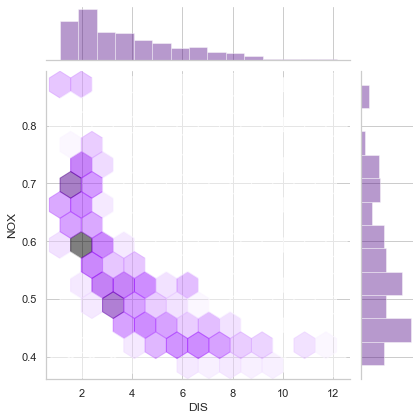

In [28]:
sns.set() # resets style
# sns.set_context('talk')   #or 'notebook'...
sns.set_style('whitegrid')
sns.jointplot(x=df['DIS'], y=df['NOX'], height=6, kind='hex',
              color='indigo', joint_kws={'alpha':0.5})
plt.show()

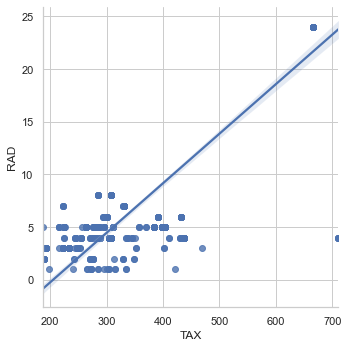

In [29]:
sns.lmplot(x='TAX', y='RAD', data=df, height=5)
plt.show()

<a id='simple'></a>
## Simple Regression
Most commonly, the steps in using the Scikit-Learn estimator API are as follows :

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
    - For supervised learning, often we predict labels for unknown data using the predict() method.
    - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [30]:
# X = df['RM'].values.reshape(-1,1)
X = df[['RM']].values
y = df['MEDV'].values

model = LinearRegression()
model.fit(X, y)

print(model.coef_)
print(model.intercept_)

[9.10210898]
-34.67062077643857


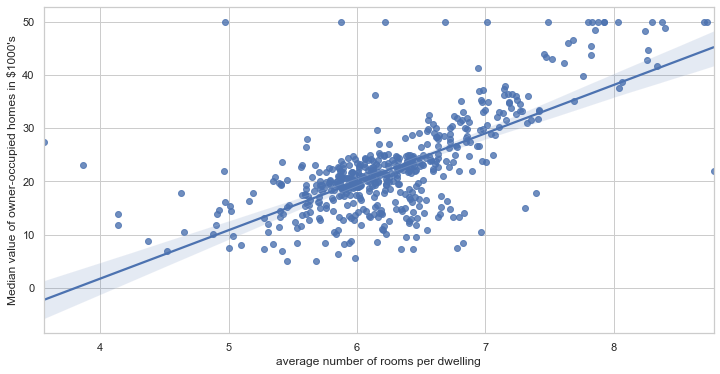

In [31]:
plt.figure(figsize=(12,6))
sns.regplot(X, y)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

Predicting the median price for a dwelling with 10 rooms:

In [32]:
model.predict(np.array([[10]]))
# model.predict(np.array([50]).reshape(1,-1))

array([56.35046904])

In [33]:
# X = df['LSTAT'].values.reshape(-1,1)
# X = df.iloc[:, :-1].values
X = df[['RM']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [34]:
print(model.coef_)
print(model.intercept_)

# print(model.predict(np.array([10]).reshape(1,-1)))
print(model.predict(np.array([[10]])))

[9.37638431]
-36.47618962764732
[57.28765351]


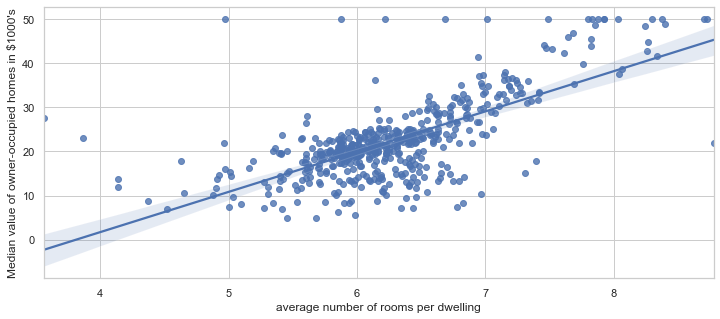

In [35]:
plt.figure(figsize=(12,5))
sns.regplot(X, y)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

<a id='simpleval'></a>
### <u>Model Evaulation</u>

#### Method 1: Residual Analysis

- similar patterns with some outliers
- fairly random with some large errors. 
- residuals of the training data are pretty similar to the test residuals - which is a good sign since it can be considered a good representation

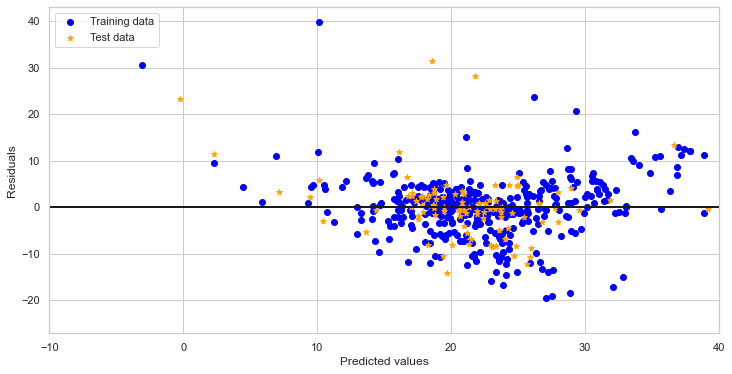

In [36]:
plt.figure(figsize=(12,6))
plt.scatter(y_train_pred, y_train-y_train_pred, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test-y_test_pred, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=40, lw=2, color='k')
plt.xlim([-10, 40])
plt.show()

#### Method 2: Mean Squared Error (MSE) $\;\;\;\;\;\;$ (the lower the better)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
print('Train MSE: ', mean_squared_error(y_train, y_train_pred))
print('Test MSE: ', mean_squared_error(y_test, y_test_pred))

Train MSE:  42.82047894172751
Test MSE:  46.907351627395315


#### Method 3: Coefficient of Determination, $R^2$  $\;\;\;\;\;\;$ (the higher the better)

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [39]:
from sklearn.metrics import r2_score

In [40]:
print('Train R^2: ',r2_score(y_train, y_train_pred))
print('Test R^2: ', r2_score(y_test, y_test_pred))

Train R^2:  0.4970800097843844
Test R^2:  0.42394386816456275


<a id='multiple'></a>
## Multiple Regression

<a id='pvalue'></a>
### <u>t-stat and p-values<u/>

In [41]:
# alternatively f_regression from sklearn.feature_selection could be used
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import numpy as np
import pandas as pd
from sklearn import linear_model
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

<a id='model'></a>
### <u>Creating and Training the Model</u>

In [42]:
# X1 = df[df.columns[:-1]]
X1 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y1 = df['MEDV']

In [43]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                        test_size=0.2, 
                                                        random_state=10)
lm1 = LinearRegression()
lm1.fit(X1_train,y1_train)
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<a id='predict'></a>
### <u>Predictions from our Model</u>

In [44]:
y1_train_pred = lm1.predict(X1_train)
y1_test_pred = lm1.predict(X1_test)

<a id='eval'></a>
### <u>Model Evaluation</u>

Let's evaluate the model by checking out it's coefficients and how we can interpret them. This is an important step when performing a regression analysis. At the end of the day, the coefficients and intercepts are the values you are looking for in order to quantify the relationship.

In [45]:
print(lm1.intercept_)
print(lm1.coef_)
print(lm1.t.flatten())
print(lm1.p.flatten())

36.53305138282439
[-1.28180656e-01  6.31981786e-02 -7.57627602e-03  1.97451452e+00
 -1.62719890e+01  3.10845625e+00  1.62922153e-02 -1.48301360e+00
  3.03988206e-01 -1.20820710e-02 -8.20305699e-01  1.14189890e-02
 -5.81626431e-01]
[ -4.01618292   4.42593843  -0.11966725   2.14072821  -4.95698566
   9.87405878   1.12737585  -7.46527066   4.71141849  -3.23309942
  -7.17160145   4.4474061  -11.39292544]
[7.09338574e-05 1.24716007e-05 9.04808206e-01 3.29138901e-02
 1.06870273e-06 0.00000000e+00 2.60274960e-01 5.45341550e-13
 3.42431498e-06 1.32850411e-03 3.73612252e-12 1.13425955e-05
 0.00000000e+00]


In [46]:
coeff_df = pd.DataFrame(lm1.coef_,index=X1.columns,columns=['Coefficients'])
coeff_df['t-stat'] = lm1.t.flatten()
coeff_df['p-value'] = lm1.p.flatten()
coeff_df

,Coefficients,t-stat,p-value
CRIM,-0.128181,-4.016183,7.093386e-05
ZN,0.063198,4.425938,1.247160e-05
INDUS,-0.007576,-0.119667,9.048082e-01
CHAS,1.974515,2.140728,3.291389e-02
NOX,-16.271989,-4.956986,1.068703e-06
RM,3.108456,9.874059,0.000000e+00
AGE,0.016292,1.127376,2.602750e-01
DIS,-1.483014,-7.465271,5.453415e-13
RAD,0.303988,4.711418,3.424315e-06
TAX,-0.012082,-3.233099,1.328504e-03


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **CRIM** is associated with a **decrease of \$128.2**.
- Holding all other features fixed, a 1 unit increase in **CHAS** is associated with an **increase of \$1974.5**.

Do the coefficients make sense? Are they the right sign? ...

#### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [47]:
from sklearn import metrics

In [48]:
# Training Metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y1_train, y1_train_pred))
print('MSE:', metrics.mean_squared_error(y1_train, y1_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, y1_train_pred)))
print('R^2:', metrics.explained_variance_score(y1_train, y1_train_pred))

print('R2_score:', r2_score(y1_train, y1_train_pred))

MAE: 3.0830955828177715
MSE: 19.23085887937306
RMSE: 4.385300318036732
R^2: 0.750121534530608
R2_score: 0.750121534530608


### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

- `n = number of observations`
- `p = number of features`

In [50]:
def adj_r2(estimator,x,y):
    r2 = estimator.score(x,y)
    # Number of observations is the shape along axis 0
    n = x.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = x.shape[1]
    # find the Adjusted R-squared using the formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2(lm1,X1_test, y1_test)

0.622321958807589

In [51]:
# Test Metrics

In [52]:
print('MAE:', metrics.mean_absolute_error(y1_test, y1_test_pred))
print('MSE:', metrics.mean_squared_error(y1_test, y1_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_test_pred)))
print('R^2:', metrics.explained_variance_score(y1_test, y1_test_pred))

print('R2_score:', r2_score(y1_test, y1_test_pred))
print('R2_score:', lm1.score(X1_test, y1_test))

MAE: 4.061419182954711
MSE: 34.413968453138565
RMSE: 5.866341999333023
R^2: 0.6761611003763048
R2_score: 0.6709339839115628
R2_score: 0.6709339839115628


#### Residual Analysis

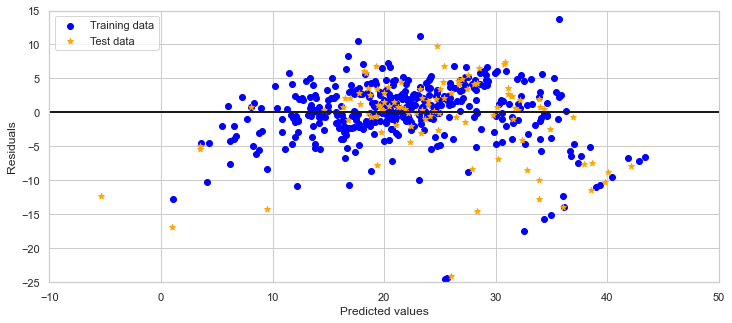

In [53]:
plt.figure(figsize=(12,5))
plt.scatter(y1_train_pred, y1_train_pred - y1_train, c='blue', marker='o', label='Training data')
plt.scatter(y1_test_pred, y1_test_pred - y1_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.ylim([-25, 15])
plt.show()

**Residual Histogram**

<AxesSubplot:xlabel='MEDV'>

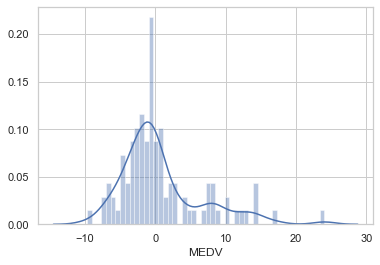

In [54]:
sns.distplot((y1_test-y1_test_pred),bins=50)

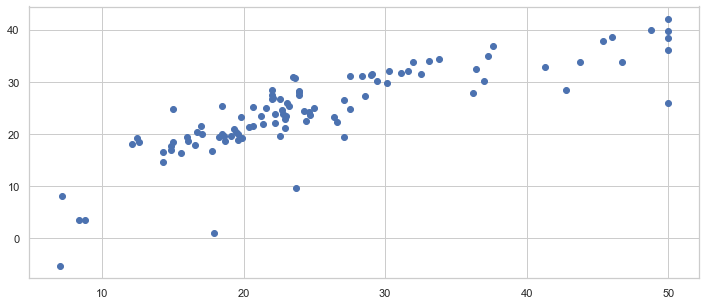

In [55]:
plt.figure(figsize=(12,5))
plt.scatter(y1_test,y1_test_pred)

<a id='transform'></a>
### <u>Improving the Model using Data Transformations</u>

In [56]:
# df['MEDV'].skew()
y1.skew()

1.1080984082549072

In [57]:
y_log = np.log(y1)
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: MEDV, dtype: float64

In [58]:
y_log.skew()

-0.33032129530987864

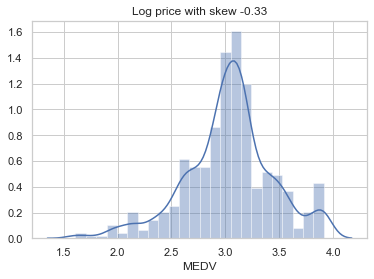

In [59]:
sns.distplot(y_log)
plt.title(f'Log price with skew {round(y_log.skew(),3)}')
plt.show()

In [60]:
X2 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y2 = np.log(df['MEDV'])

X_train, X_test, y_train, y_test = train_test_split(X2, y2, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724


Taking the log of the dependent variable has improved the models performance

In [61]:
print(regr.intercept_)
print(regr.coef_)
print(regr.t.flatten())
print(regr.p.flatten())

4.05994387177519
[-1.06717261e-02  1.57929102e-03  2.02989827e-03  8.03305301e-02
 -7.04068057e-01  7.34044072e-02  7.63301755e-04 -4.76332789e-02
  1.45651350e-02 -6.44998303e-04 -3.47947628e-02  5.15896157e-04
 -3.13900565e-02]
[ -7.99349876   2.64407774   0.76648744   2.08205924  -5.12746743
   5.57422292   1.26268812  -5.73221077   5.39660596  -4.12617358
  -7.27219549   4.80344333 -14.69922593]
[1.48769885e-14 8.52113138e-03 4.43848832e-01 3.79868291e-02
 4.62931912e-07 4.64126038e-08 2.07453812e-01 1.98382279e-08
 1.17972415e-07 4.50965015e-05 1.94511074e-12 2.22595690e-06
 0.00000000e+00]


In [62]:
coeff_df = pd.DataFrame(regr.coef_,index=X2.columns,columns=['log_Coefficients'])
coeff_df['norm_coef'] = np.e**regr.coef_
coeff_df['t-stat'] = regr.t.flatten()
coeff_df['p-value'] = regr.p.flatten()
coeff_df

,log_Coefficients,norm_coef,t-stat,p-value
CRIM,-0.010672,0.989385,-7.993499,1.487699e-14
ZN,0.001579,1.001581,2.644078,8.521131e-03
INDUS,0.002030,1.002032,0.766487,4.438488e-01
CHAS,0.080331,1.083645,2.082059,3.798683e-02
NOX,-0.704068,0.494569,-5.127467,4.629319e-07
RM,0.073404,1.076166,5.574223,4.641260e-08
AGE,0.000763,1.000764,1.262688,2.074538e-01
DIS,-0.047633,0.953483,-5.732211,1.983823e-08
RAD,0.014565,1.014672,5.396606,1.179724e-07
TAX,-0.000645,0.999355,-4.126174,4.509650e-05


<a id='feature'></a>
### <u>Feature Selection<u/>
There are many different approaches to feature selection, however, we will use one of the simplest. This module allows us to select the most appopriate features for our regression. f_regression finds the F-statistics for the *simple* regressions created with each of the independent variables. The limitation of this approach is that it does not take into account the mutual effect of any two features.

In [63]:
from sklearn.feature_selection import f_regression

In [64]:
f_regression(X_train, y_train)

# There are two output arrays:
# The first one contains the F-statistics for each of the regressions
# The second one contains the p-values of these F-statistics

(array([153.17157576,  73.05180284, 175.41067183,   8.45379918,
        152.11432834, 216.64808581, 119.90078804,  64.67777644,
        115.8451534 , 183.21032628, 121.22232476,  78.40260301,
        737.44213942]),
 array([4.96557180e-30, 2.66002697e-16, 1.76535534e-33, 3.84467482e-03,
        7.30191308e-30, 1.56562320e-39, 1.34792401e-24, 9.98251906e-15,
        6.55115166e-24, 1.17257001e-34, 8.07441443e-25, 2.72024115e-17,
        5.59427889e-93]))

Since we are more interested in the latter (p-values), we can just take the second array. To be able to quickly evaluate them, we can round the result to 3 digits

In [65]:
p_values = f_regression(X_train, y_train)[1]
p_values

array([4.96557180e-30, 2.66002697e-16, 1.76535534e-33, 3.84467482e-03,
       7.30191308e-30, 1.56562320e-39, 1.34792401e-24, 9.98251906e-15,
       6.55115166e-24, 1.17257001e-34, 8.07441443e-25, 2.72024115e-17,
       5.59427889e-93])

In [66]:
p_values.round(3)

array([0.   , 0.   , 0.   , 0.004, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

<a id='stand'></a>
## Feature selection through Standardization

The closer our weight is to zero the smaller its impact the bigger the weight the bigger its impact.

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
X3 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y3 = np.log(df['MEDV'])

X_train, X_test, y_train, y_test = train_test_split(X3, y3, 
                                                    test_size=0.2, random_state=10)

scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X_train)

regr = LinearRegression()
regr.fit(X3_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### The closer our weight is to zero the smaller its impact the bigger the weight the bigger its impact.

In [69]:
coef_df = pd.DataFrame(regr.coef_, index=X3.columns, columns=['Weights'])

int_df = pd.DataFrame({'Weights':[regr.intercept_]}, index=['intercept'])  
# can change 'intercept' to 'bias'

# sum_df = pd.concat([int_df,coef_df])
sum_df = int_df.append(coef_df)
sum_df

,Weights
intercept,3.005593
CRIM,-0.096951
ZN,0.037463
INDUS,0.014117
CHAS,0.020061
NOX,-0.082816
RM,0.049269
AGE,0.021312
DIS,-0.101424
RAD,0.129880


<a id='predi'></a>
## Making predictions with the standardized coefficients (weights)

In [70]:
regr.predict(scaler.transform([X_test.loc[305].values]))

array([3.39421046])

In [71]:
regr.predict(scaler.transform(X_test.values))

array([3.39421046, 3.43441934, 3.41176747, 3.06945742, 2.92845067,
       2.72402178, 3.62353505, 2.71520447, 3.17932185, 3.63129825,
       2.97914751, 3.40041459, 3.3033318 , 3.54616142, 3.54601977,
       3.68006769, 3.20044902, 3.12079129, 3.2067572 , 2.98393491,
       3.50006096, 2.77168478, 3.17140406, 3.219181  , 3.46630881,
       3.04712364, 2.91513994, 2.75390782, 3.73209585, 1.97075555,
       3.39693209, 3.45227899, 3.20509743, 3.18576127, 2.88516824,
       2.93557157, 2.03055545, 3.53342166, 3.29151384, 3.28269972,
       3.51567673, 3.37988361, 2.74834595, 3.43870884, 2.87605191,
       3.27613204, 2.88526672, 2.94625631, 3.68255635, 2.80811054,
       3.17407477, 2.82353563, 3.17064813, 3.50308988, 3.24000365,
       3.48068381, 2.99677072, 2.92127401, 2.94877028, 2.96384339,
       2.94172924, 3.08674557, 3.71889409, 3.74752737, 3.40364678,
       2.77002706, 3.21130152, 2.11429364, 3.46572463, 3.30576125,
       2.79917095, 3.33224552, 2.91577496, 3.18217486, 3.13797

In [72]:
regr.predict(X_test)

array([ -2.26326894,  -7.01664304, -13.54075549, -15.95708706,
       -25.98738696, -66.31882055, -21.92159059, -28.80090158,
        -4.47267201, -11.02187316, -22.58058484, -12.63338332,
        -0.554385  ,  -4.73728893,  -5.53056344,  -6.04380038,
       -11.27483522,  -1.32694146, -12.36127638, -27.44474657,
       -22.94948753, -55.81961395, -26.69905852, -10.75014263,
       -21.108244  ,  -4.56976124, -14.42158806, -58.21197969,
        -1.8516624 , -74.87701851, -15.27762828, -12.6765377 ,
       -15.59758468,  -6.11765033, -52.09785771, -23.05826359,
       -72.55845413,  -2.89724716, -12.19064299,  -8.88651622,
       -13.18900856, -11.76322779, -53.71216515,  -7.51212471,
        -7.04627579, -17.74438387, -53.32161986, -52.51218093,
        -1.15501781, -14.4567924 , -23.2787888 , -52.20923294,
       -13.90731025,  -9.31046748,  -8.68633312,  -6.81596963,
       -27.74481874, -51.29124503, -16.49335566, -52.10451541,
       -27.41663405, -27.12692936, -21.47885856,  -5.77

<a id='movie'></a>
### Example2: Predict Movie Box Office Revenue

[dataset link](https://www.the-numbers.com/movie/budgets)

In [73]:
df = pd.read_csv('./datasets/Linear_Regression/cost_revenue_dirty.csv')
df1 = df.sort_values(by='Rank')
df1.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
3529,1,12/18/2009,Avatar,"$425,000,000","$2,783,918,982","$760,507,625"
5079,2,12/18/2015,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$2,058,662,225","$936,662,225"
2911,3,5/24/2007,Pirates of the Caribbean: At World’s End,"$300,000,000","$963,420,425","$309,420,425"
4925,4,6/11/2015,Spectre,"$300,000,000","$879,620,923","$200,074,175"
4196,5,7/20/2012,The Dark Knight Rises,"$275,000,000","$1,084,439,099","$448,139,099"


In [74]:
df1.shape

(5391, 6)

In [75]:
df1.columns

Index(['Rank', 'Release Date', 'Movie Title', 'Production Budget ($)',
       'Worldwide Gross ($)', 'Domestic Gross ($)'],
      dtype='object')

In [76]:
# take out any rows where values are zero - due to lack of info or not yet released...
df1 = df1[~((df1['Worldwide Gross ($)']=='$0') & (df1['Domestic Gross ($)']=='$0'))]
df1

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
3529,1,12/18/2009,Avatar,"$425,000,000","$2,783,918,982","$760,507,625"
5079,2,12/18/2015,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$2,058,662,225","$936,662,225"
2911,3,5/24/2007,Pirates of the Caribbean: At World’s End,"$300,000,000","$963,420,425","$309,420,425"
4925,4,6/11/2015,Spectre,"$300,000,000","$879,620,923","$200,074,175"
4196,5,7/20/2012,The Dark Knight Rises,"$275,000,000","$1,084,439,099","$448,139,099"
...,...,...,...,...,...,...
2678,5385,5/26/2006,Cavite,"$7,000","$71,644","$70,071"
2157,5386,1/1/2004,The Mongol King,"$7,000",$900,$900
1209,5387,2/4/1999,Following,"$6,000","$240,495","$48,482"
2462,5388,7/13/2005,Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [77]:
df1.drop(columns=['Rank','Release Date','Movie Title','Domestic Gross ($)'], inplace=True)

In [78]:
df1.rename(columns={'Worldwide Gross ($)':'worldwide_gross_usd', 
                   'Production Budget ($)':'production_budget_usd'},inplace=True)

In [79]:
df1['production_budget_usd'] = df1['production_budget_usd'].apply(lambda x: int(x.replace('$','').replace(',','')))
# df['worldwide_gross_usd'] = df['worldwide_gross_usd'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

In [80]:
df1['worldwide_gross_usd'] = df1['worldwide_gross_usd'].replace({'\$': '', ',': ''},regex=True)

In [81]:
df1 = df1.astype('int64')

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5034 entries, 3529 to 2427
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   production_budget_usd  5034 non-null   int64
 1   worldwide_gross_usd    5034 non-null   int64
dtypes: int64(2)
memory usage: 118.0 KB


In [83]:
df1.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [84]:
X = df1[['production_budget_usd']]
y = df1['worldwide_gross_usd']

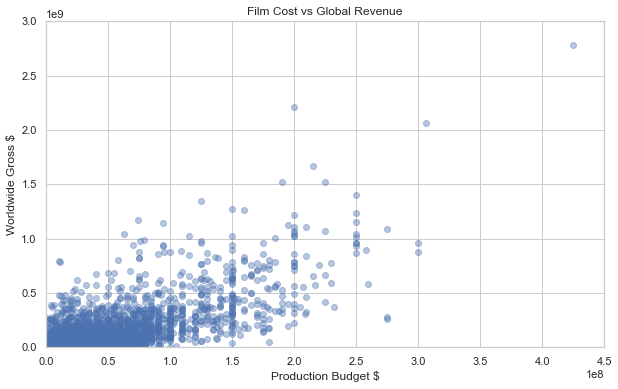

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.4)
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [86]:
regression = LinearRegression()
regression.fit(X, y)

C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Slope coefficient:

In [87]:
# beta_1 - slope
regression.coef_    

array([3.11150918])

In [88]:
# beta 0 - Intercept
regression.intercept_

-7236192.729139611

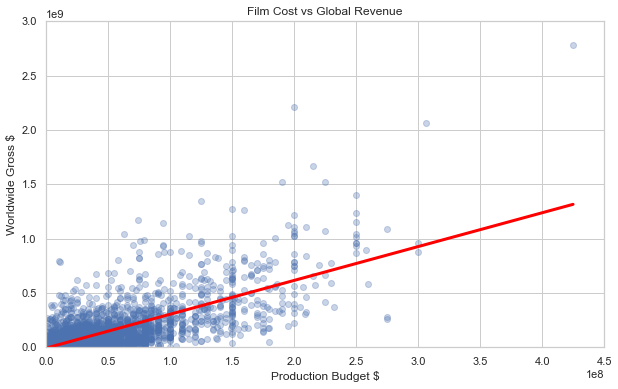

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)

# Adding the regression line here:
plt.plot(X, regression.predict(X), color='red', linewidth=3)

plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [90]:
#Getting r square from Regression
regression.score(X, y)

0.5496485356985727

In [91]:
regression.predict([[50000000]])

array([1.48339266e+08])

In [92]:
regression.predict([[50000000], [85000000]])

array([1.48339266e+08, 2.57242088e+08])

<a id='lsd'></a>
###  Example 3: LSD vs Math Test Scores

In [93]:
import pandas as pd
data = pd.read_csv('./datasets/Linear_Regression/lsd_math_score_data.csv')

In [94]:
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score
0,5,1.17,78.93
1,15,2.97,58.20
2,30,3.26,67.47
3,60,4.69,37.47
4,120,5.83,45.65
5,240,6.00,32.92
6,480,6.41,29.97


In [95]:
type(data)

pandas.core.frame.DataFrame

In [96]:
onlyMathScores = data['Avg_Math_Test_Score']
print(onlyMathScores)

0    78.93
1    58.20
2    67.47
3    37.47
4    45.65
5    32.92
6    29.97
Name: Avg_Math_Test_Score, dtype: float64


In [97]:
type(onlyMathScores)

pandas.core.series.Series

#### Challenge: Create a column with the name jennifer lopez and another column with the value of 100

In [98]:
data['Test_Subject'] = 'Jennifer Lopez'
data['High_Score'] = 100
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score,Test_Subject,High_Score
0,5,1.17,78.93,Jennifer Lopez,100
1,15,2.97,58.20,Jennifer Lopez,100
2,30,3.26,67.47,Jennifer Lopez,100
3,60,4.69,37.47,Jennifer Lopez,100
4,120,5.83,45.65,Jennifer Lopez,100
5,240,6.00,32.92,Jennifer Lopez,100
6,480,6.41,29.97,Jennifer Lopez,100


#### Challenge: Overwrite values in rows for High_Score to equal average score + 100

In [99]:
data['High_Score'] = data['High_Score'] + data['Avg_Math_Test_Score']
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score,Test_Subject,High_Score
0,5,1.17,78.93,Jennifer Lopez,178.93
1,15,2.97,58.20,Jennifer Lopez,158.20
2,30,3.26,67.47,Jennifer Lopez,167.47
3,60,4.69,37.47,Jennifer Lopez,137.47
4,120,5.83,45.65,Jennifer Lopez,145.65
5,240,6.00,32.92,Jennifer Lopez,132.92
6,480,6.41,29.97,Jennifer Lopez,129.97


#### Challenge: Square the values stored inside High_Score

In [100]:
data['High_Score'] = data['High_Score'] ** 2
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score,Test_Subject,High_Score
0,5,1.17,78.93,Jennifer Lopez,32015.9449
1,15,2.97,58.20,Jennifer Lopez,25027.2400
2,30,3.26,67.47,Jennifer Lopez,28046.2009
3,60,4.69,37.47,Jennifer Lopez,18898.0009
4,120,5.83,45.65,Jennifer Lopez,21213.9225
5,240,6.00,32.92,Jennifer Lopez,17667.7264
6,480,6.41,29.97,Jennifer Lopez,16892.2009


#### Challenge: Create a list called columnList. Put 'LSD_ppm' and 'Avg_Math_Test_Score' inside.

In [101]:
columnList = data[['LSD_ppm', 'Avg_Math_Test_Score']]
print(columnList)

   LSD_ppm  Avg_Math_Test_Score
0     1.17                78.93
1     2.97                58.20
2     3.26                67.47
3     4.69                37.47
4     5.83                45.65
5     6.00                32.92
6     6.41                29.97


In [102]:
type(columnList)

pandas.core.frame.DataFrame

In [103]:
y = data[['Avg_Math_Test_Score']]

In [104]:
type(y)

pandas.core.frame.DataFrame

#### Challenge: Create a variable called X and set it equal to the values of LSD_ppm. Make sure X is a dataframe. Print and show the data type.

In [105]:
X = data[['LSD_ppm']]
print(X)
type(X)

   LSD_ppm
0     1.17
1     2.97
2     3.26
3     4.69
4     5.83
5     6.00
6     6.41


pandas.core.frame.DataFrame

#### Challenge: Delete Test_Subject High_Score columns from the data

In [106]:
del data['Test_Subject']
print(data)

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score  High_Score
0                      5     1.17                78.93  32015.9449
1                     15     2.97                58.20  25027.2400
2                     30     3.26                67.47  28046.2009
3                     60     4.69                37.47  18898.0009
4                    120     5.83                45.65  21213.9225
5                    240     6.00                32.92  17667.7264
6                    480     6.41                29.97  16892.2009


In [107]:
del data['High_Score']
print(data)

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score
0                      5     1.17                78.93
1                     15     2.97                58.20
2                     30     3.26                67.47
3                     60     4.69                37.47
4                    120     5.83                45.65
5                    240     6.00                32.92
6                    480     6.41                29.97


In [108]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [109]:
time = data[['Time_Delay_in_Minutes']]
LSD = data[['LSD_ppm']]
score = data[['Avg_Math_Test_Score']]

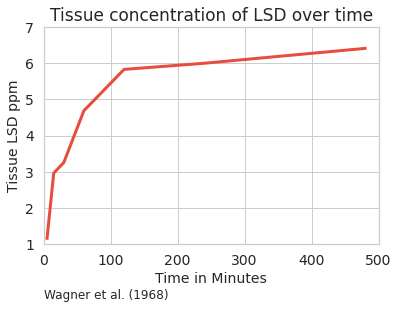

In [110]:
%matplotlib inline

plt.title('Tissue concentration of LSD over time', fontsize=17)
plt.xlabel('Time in Minutes', fontsize=14)
plt.ylabel('Tissue LSD ppm', fontsize=14)
plt.text(x=0, y=-0.5, s='Wagner et al. (1968)', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(1,7)
plt.xlim(0,500)

plt.style.use('classic')

plt.plot(time, LSD, color='#e74c3c', linewidth=3)
plt.show()

In [111]:
regr = LinearRegression()
regr.fit(LSD, score)
print('Theta1 : ', regr.coef_[0][0])
print('Intercept: ', regr.intercept_[0])
print('R-Square: ', regr.score(LSD, score))
predicted_score = regr.predict(LSD)

Theta1 :  -9.009466415296785
Intercept:  89.12387376799308
R-Square:  0.8778349707775889


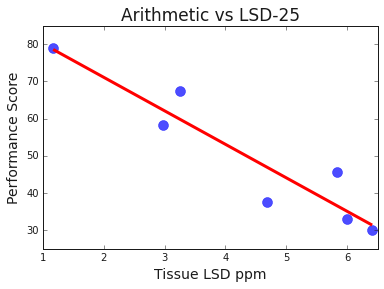

In [112]:
%matplotlib inline

plt.title('Arithmetic vs LSD-25', fontsize=17)
plt.xlabel('Tissue LSD ppm', fontsize=14)
plt.ylabel('Performance Score', fontsize=14)
plt.ylim(25, 85)
plt.xlim(1, 6.5)
plt.style.use('fivethirtyeight')

plt.scatter(LSD, score, color='blue', s=100, alpha=0.7)
plt.plot(LSD, predicted_score, color='red', linewidth=3)
plt.show()

### Standardise Variable to Identify Key Feature(s)

In order to perform point 2 properly, one needs to standardise the variable

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
model = LinearRegression()

In [115]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
# result = pd.DataFrame(model.coef_, columns=['coefficient'], index=df.columns)

result = pd.DataFrame(list(zip(model.coef_, X.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
LSD_ppm,[9.009466415296785]


In [117]:
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import make_pipeline  
scaler1 = StandardScaler() 
model1 = LinearRegression()
standard_coefficient_linear_reg = make_pipeline(scaler1, model1)

In [118]:
standard_coefficient_linear_reg.fit(X,y)
result = pd.DataFrame(list(zip(standard_coefficient_linear_reg.steps[1][1].coef_, X.columns)), 
                      columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
LSD_ppm,[16.143561361587878]


<a id='practical'></a>
### <u>Practical example</u>

## Importing the relevant libraries

In [119]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [120]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('./datasets/Linear_Regression/Practical_example.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing
### Exploring the descriptive statistics of the variables

Descriptive statistics are very useful for initial exploration of the variables. By default, only descriptives for the numerical variables are shown. To include the categorical ones, we need to specify this with an argument.

In [121]:
# raw_data.describe(include='all')

object_cat = raw_data.describe(include=['object'])
num_cat = raw_data.describe()
pd.concat([num_cat,object_cat])

,Price,Mileage,EngineV,Year,Brand,Body,Engine Type,Registration,Model
count,4173.000000,4345.000000,4195.000000,4345.000000,NaN,NaN,NaN,NaN,NaN
mean,19418.746935,161.237284,2.790734,2006.550058,NaN,NaN,NaN,NaN,NaN
std,25584.242620,105.705797,5.066437,6.719097,NaN,NaN,NaN,NaN,NaN
min,600.000000,0.000000,0.600000,1969.000000,NaN,NaN,NaN,NaN,NaN
25%,6999.000000,86.000000,1.800000,2003.000000,NaN,NaN,NaN,NaN,NaN
50%,11500.000000,155.000000,2.200000,2008.000000,NaN,NaN,NaN,NaN,NaN
75%,21700.000000,230.000000,3.000000,2012.000000,NaN,NaN,NaN,NaN,NaN
max,300000.000000,980.000000,99.990000,2016.000000,NaN,NaN,NaN,NaN,NaN
count,NaN,NaN,NaN,NaN,4345,4345,4345,4345,4345
unique,NaN,NaN,NaN,NaN,7,6,4,2,312


### Determining the variables of interest

In [122]:
# We will create the regression without 'Model'
data = raw_data.drop(['Model'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [123]:
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Let's simply drop all missing values. This is not always recommended, however, when we remove less than 5% of the data, it is okay. 

In [124]:
data_no_mv = data.dropna(axis=0)

In [125]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs
A great step in the data exploration is to display the probability distribution function (PDF) of a variable. The PDF will show us how that variable is distributed. This makes it very easy to spot anomalies, such as outliers. The PDF is often the basis on which we decide whether we want to transform a feature.

<AxesSubplot:xlabel='Price'>

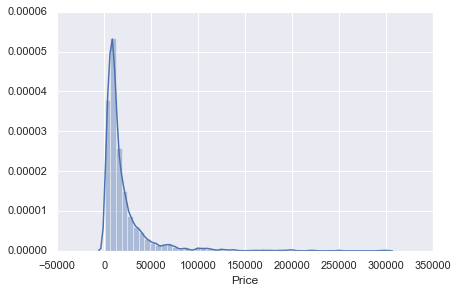

In [126]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [127]:
data_no_mv['Price'].quantile(0.99)

129812.51999999981

Obviously there are some outliers present. Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples. Here, the outliers are situated around the higher prices (right side of the graph). Logic should also be applied - this is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

Outliers are a great issue for OLS, thus we must deal with them in some way. It may be a useful exercise to try training a model without removing the outliers

In [128]:
# Declare a variable equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Create a new df, with the condition that prices be below the 99 percentile
data_1 = data_no_mv[data_no_mv['Price']<q]
# We have essentially removed the top 1% of the data using the 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


We can check the PDF once again to ensure that the result is still distributed in the same way overall, however, there are much fewer outliers.

<AxesSubplot:xlabel='Price'>

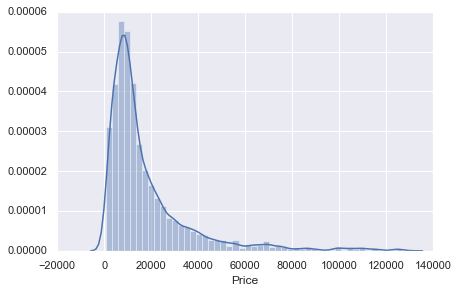

In [129]:
sns.distplot(data_1['Price'])

<AxesSubplot:xlabel='Mileage'>

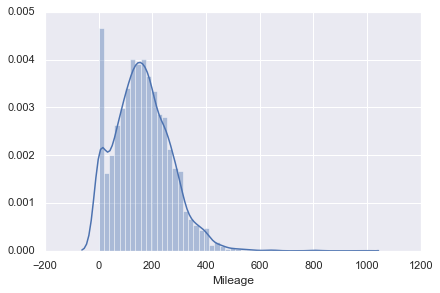

In [130]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['Mileage'])

In [131]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<AxesSubplot:xlabel='Mileage'>

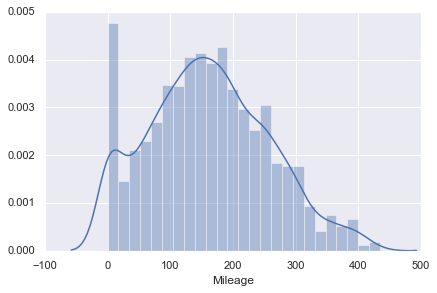

In [132]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['Mileage'])

The situation with engine volume is very strange. In such cases it makes sense to manually check what may be causing the problem. In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99. There are also some incorrect entries like 75.

<AxesSubplot:xlabel='EngineV'>

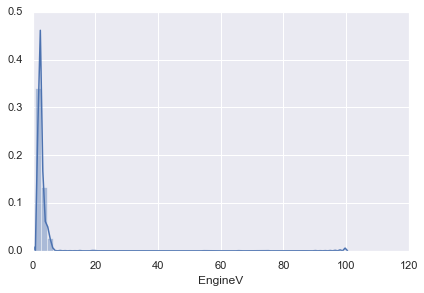

In [133]:
sns.distplot(data_no_mv['EngineV'])

A simple Google search can indicate the natural domain of this variable. Car engine volumes are usually (always?) below $6.51$. This is a prime example of the fact that a domain expert (a person working in the car industry) may find it much easier to determine problems with the data than an outsider.

In [134]:
data_3 = data_2[data_2['EngineV']<6.5]

Following this graph, we realize we can actually treat EngineV as a categorical variable though we will leave it for now.

<AxesSubplot:xlabel='EngineV'>

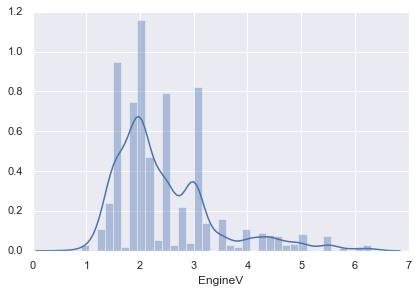

In [135]:
sns.distplot(data_3['EngineV'])

Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'. However, the outliers are on the low end.

<AxesSubplot:xlabel='Year'>

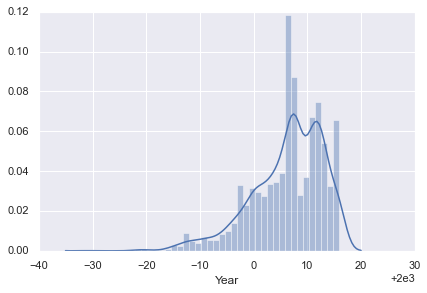

In [136]:
sns.distplot(data_no_mv['Year'])

In [137]:
# We can remove them via
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<AxesSubplot:xlabel='Year'>

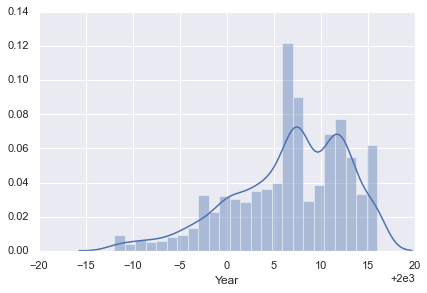

In [138]:
# Here's the new result
sns.distplot(data_4['Year'])

**Note:** When we remove observations, the original indexes are preserved. If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6. That's very problematic as we tend to forget about it.

Finally, once we reset the index, a new column will be created containing the old index (just in case). We won't be needing it, thus set `drop=True` to completely forget about it

In [139]:
data_cleaned = data_4.reset_index(drop=True)

In [140]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [141]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

In [142]:
data_cleaned.select_dtypes(exclude=['object'])

,Price,Mileage,EngineV,Year
0,4200.0,277,2.0,1991
1,7900.0,427,2.9,1999
2,13300.0,358,5.0,2003
3,23000.0,240,4.2,2007
4,18300.0,120,2.0,2011
...,...,...,...,...
3862,11500.0,163,2.5,2008
3863,17900.0,35,1.6,2014
3864,125000.0,9,3.0,2014
3865,6500.0,1,3.5,1999


In [143]:
def distributions(dataframe):
    
    df = dataframe.select_dtypes(exclude=['object'])
    columns = df.shape[1]
    rows = columns//4
    
    f, *ax = plt.subplots(rows, columns, figsize =(15,3.5))
    
    for name, axis in zip(df.columns, ax[0]):
        sns.distplot(df[name], bins=50, hist=True, kde=True, color='#fbc02d',ax=axis)

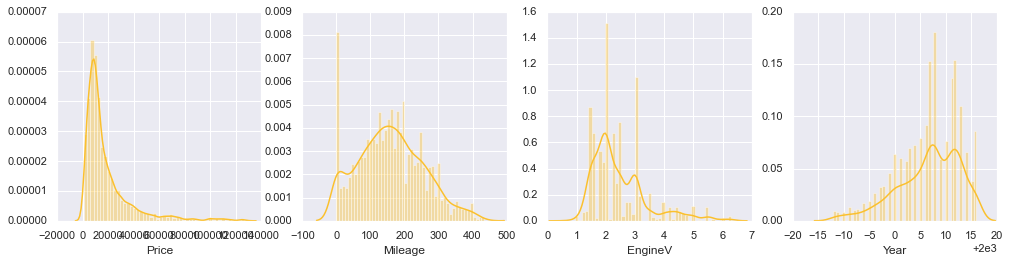

In [144]:
distributions(data_cleaned)

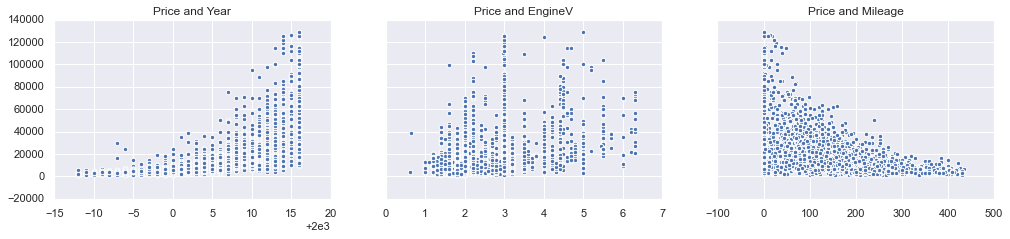

In [145]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed. A good transformation in that case is a log transformation.

<AxesSubplot:xlabel='Price'>

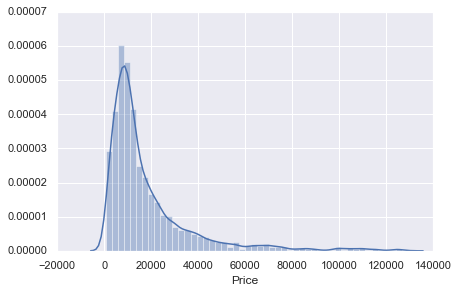

In [146]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [147]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


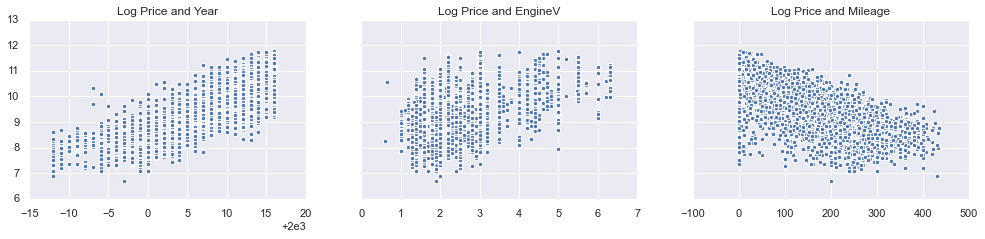

In [148]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# Alternatively we could have transformed each of the independent variables

In [149]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [150]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

Sklearn does not have a built-in way to check for multicollinearity. One of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones. surely it is an issue nonetheless, thus we will try to deal with it. 

In [151]:
# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible,with the features of interest and want 
# to check for multicollinearity. Since our categorical data is not yet 
# preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs. Note that 
# each variable has its own variance inflation factor as this measure 
# is variable specific (not model specific)
vif = pd.DataFrame()

# Output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) 
              for i in range(variables.shape[1])]
# Include names so it is easier to explore the result
vif["Features"] = variables.columns

In [152]:
# Let's explore the result
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


|||
|:-:|:-:|
|VIF = 1|No correlation between a given explanatory variable<br>and any other explanatory variables in the model|
|1 < VIF < 5|Moderate correlation<br>but often not severe enough to require attention|
|VIF > 6 to 10|Potentially severe correlation.<br>Coefficient estimates and p-values unreliable|

Since Year has the highest VIF, I will remove it from the model. This will drive the VIF of other variables down. So even if EngineV seems like a high VIF, too, once 'Year' is gone that will no longer be the case.

In [153]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Encoding categorical data
To include the categorical data in the regression, let's create dummies. There is a very convenient method called `get_dummies` which does that seemlessly. It is extremely important that we drop one of the dummies to avoid the dummy variable trap (resulting in severe multicollinearity).

In [154]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [155]:
# Here's the result
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [156]:
data_with_dummies.shape

(3867, 18)

In [157]:
data_no_multicollinearity.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'log_price'],
      dtype='object')

In [158]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [159]:
vif = pd.DataFrame()

# make use of the variance_inflation_factor to output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(data_with_dummies.values, i) 
              for i in range(data_with_dummies.shape[1])]

# Include names so it is easier to explore the result
vif["Features"] = data_with_dummies.columns
vif

,VIF,Features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


### Rearrange a bit
To make our data frame more organized, we prefer to place the dependent variable in the beginning of the dataframe. Since each problem is different, that must sometimes be done manually. We can display all possible features and then choose the desired order.

In [160]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order. Conventionally, the most intuitive order is: *dependent variable, indepedendent numerical variables, dummies*.

In [161]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features.

In [162]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [163]:
# The target(s) (dependent variable) is 'log price'
target = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [164]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [165]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [166]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, 
                                                    random_state=365)

### Create the regression

In [167]:
reg = LinearRegression()

# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's check the outputs of the regression

In [168]:
y_hat = reg.predict(x_train)

The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot. The closer the points to the 45-degree line, the better the prediction

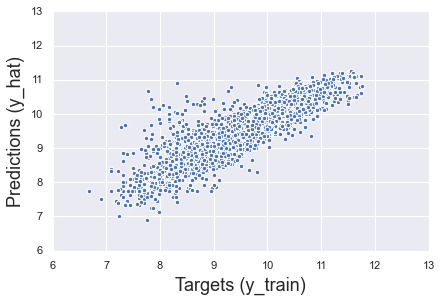

In [169]:
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Another useful check of our model is a residual plot. We can plot the PDF of the residuals and check for anomalies. Best case scenario - this plot should be normally distributed. In our case we notice that there are many negative residuals (far away from the mean). Given the definition of the residuals (y_train - y_hat), negative values imply that y_hat (predictions) are much higher than y_train (the targets).

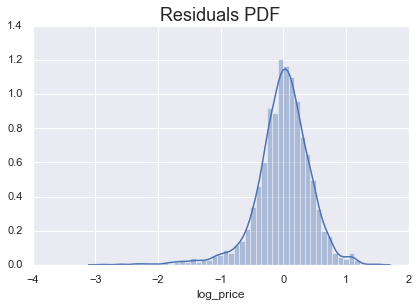

In [170]:
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)
plt.show()

Find the R-squared of the model

In [171]:
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared

0.744996578792662

### Finding the bias and weights

In [172]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.415239458021299

In [173]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [174]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [175]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# This way we can see which 'Brand' is the dummy benchmark (audi in this case)

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing
Once we have trained and fine-tuned our model, we can proceed to test it. 
- If the predictions are far off, we will know that our model overfitted

In [176]:
y_hat_test = reg.predict(x_test)

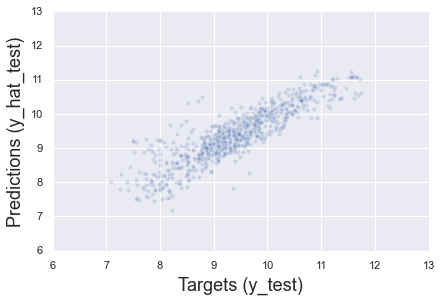

In [177]:
# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Finally, let's manually check these predictions. To obtain the actual prices, we take the exponential of the log_price.

In [178]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [179]:
# We can also include the test targets in that data frame
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


Note that we have a lot of missing values. There is no reason to have ANY missing values, which suggests that something is wrong with the data frame / indexing.

After displaying y_test, we find what the issue is. The old indexes are preserved. Therefore, to get a proper result, we must reset the index and drop the old indexing.

In [180]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

Let's overwrite the 'Target' column with the appropriate values. Again, we need the exponential of the test log price.

In [181]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


Additionally, we can calculate the difference between the targets and the predictions. Note that this is actually the residual.

In [182]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals), this comparison makes a lot of sense. 

It also makes sense to see how far off we are from the result percentage-wise. Here, we take the absolute difference in %, so we can easily order the dataframe.

In [183]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [185]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [186]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
# pd.options.display.max_rows = 999

# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%']).head()

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
